# Salary 

In [1]:
import pandas as pd
df = pd.read_csv('/content/Salary_Data.csv')

In [2]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


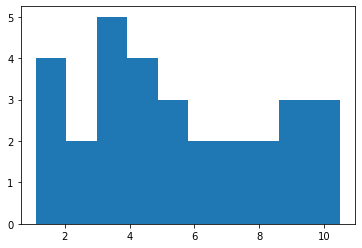

In [4]:
# finding outliers
import matplotlib.pyplot as plt
import numpy as np
x = df['YearsExperience']
plt.hist(x)
plt.show()

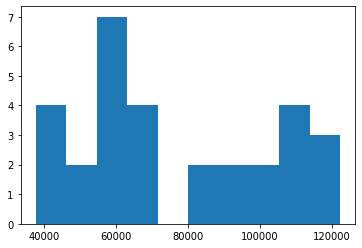

In [5]:
x = df['Salary']
plt.hist(x)
plt.show()

<function matplotlib.pyplot.show>

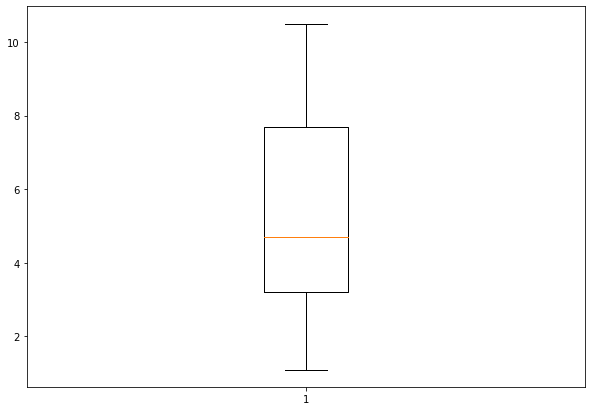

In [6]:
YOF = df['YearsExperience']
sal = df['Salary']
fig = plt.figure(figsize = (10,7))
plt.boxplot(YOF)
plt.show

<function matplotlib.pyplot.show>

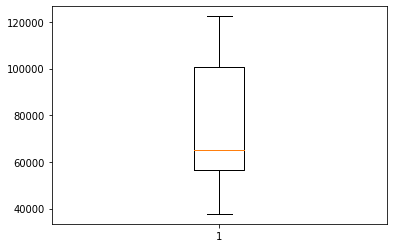

In [7]:
plt.boxplot(sal)
plt.show

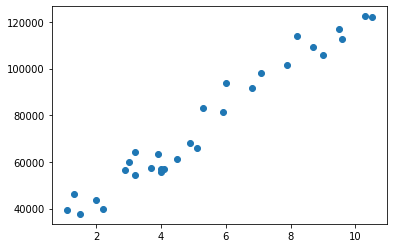

In [8]:
# scatterplot
plt.scatter(YOF,sal)
plt.show()

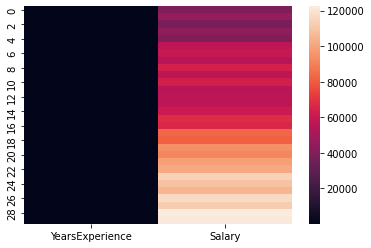

In [9]:
# heatmap for finding missing values
import seaborn as sns
hm = sns.heatmap(data = df)
plt.show()

<Figure size 720x432 with 0 Axes>

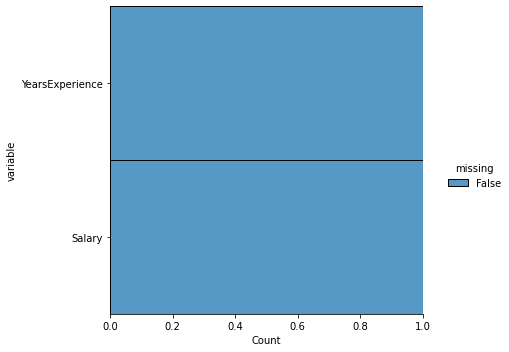

In [16]:
# displot for finding missing values
plt.figure(figsize=(10,6))
sns.displot(
    data = df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [10]:
# finding correlation i.e. r-value
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## fitting a model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [14]:
# r_squared values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## predicting new data points

In [15]:
# predictions
testdata = pd.Series([35000, 75000, 55000])
pred = pd.DataFrame(testdata, columns = ['YearsExperience'])
model.predict(pred)

0    3.307745e+08
1    7.087730e+08
2    5.197737e+08
dtype: float64

# Delivery time

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/delivery_time.csv')
#renaming without spaces
df = df.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'})
df.head(5)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
df.shape

(21, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


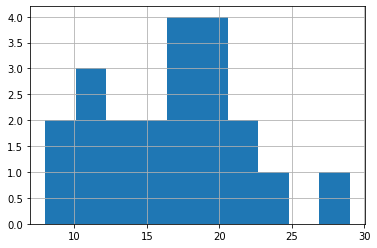

In [ ]:
# finding outliers
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
df['Delivery_Time'].hist()

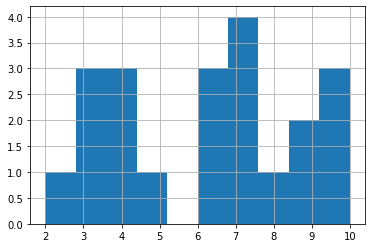

In [ ]:
df['Sorting_Time'].hist()

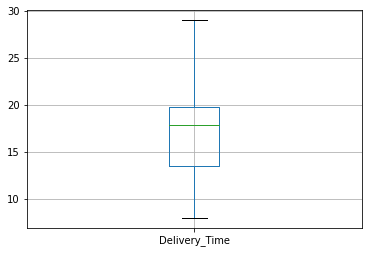

In [ ]:
# multiple boxplot
df.boxplot(column = ['Delivery_Time'])

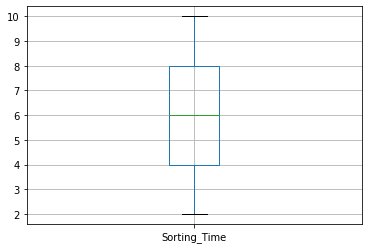

In [ ]:
df.boxplot(column = ['Sorting_Time'])

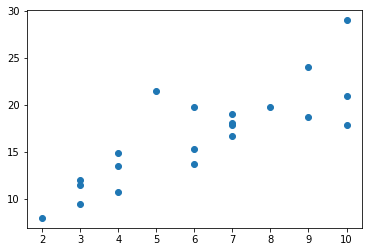

In [ ]:
# scatterplot
plt.scatter(df['Sorting_Time'],df['Delivery_Time'])
plt.show()

In [ ]:
# detecting outlier using z-score
outliers = []

def detectOutlier(data):
    threshold = 1.5
    mean = np.mean(data)
    std = np.std(data)
   
    for i in data:
        z_score = (i-mean)/std
        # print(z_score)
        if np.abs(z_score) > threshold:
          outliers.append(i)
    return outliers

In [ ]:
out = detectOutlier(df['Sorting_Time'])
print(out)
# del out

[10, 10, 10, 2]


In [ ]:
# print(detectOutlier(df['Delivery_Time']))
b = detectOutlier(df['Delivery_Time'])
print(b)
b.clear()

[10, 10, 10, 2, 29.0, 8.0]


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# replacing values in column
# df["Sorting_Time"].replace([10,10,2], 6, inplace = True)
# print(df['Sorting_Time'])

In [ ]:
# df["Delivery_Time"].replace([29,8], 16, inplace = True)
# print(df['Delivery_Time'])

## detecting outlier using IQR

In [ ]:
def findIQR(data):
  Q1 = np.percentile(data, 25,interpolation = 'midpoint')
  Q3 = np.percentile(data, 75,interpolation = 'midpoint')
  IQR = Q3 - Q1
  upperbound = Q3 + (1.5*IQR)
  lowerbound = Q1 - (1.5*IQR)
  return [upperbound, lowerbound]

In [ ]:
u , l = findIQR(df['Sorting_Time'])
print(u,l)
upper = []
lower = []
# print(df['Sorting_Time'])
for i in df['Sorting_Time']:
  if i >= u:
    print(i)
    print('hello')
    upper.append(i)
  elif i <=  l:
    lower.append(i)
    print('hello')

# print(upper)
# print(lower)

14.0 -2.0


In [ ]:
# finding correlation r-value
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## Heatmap for checking missing values

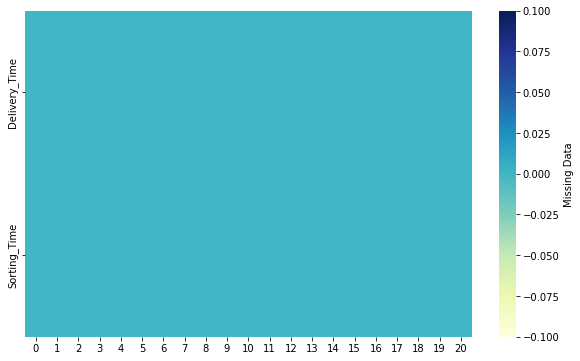

In [ ]:
import seaborn as sns
# heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

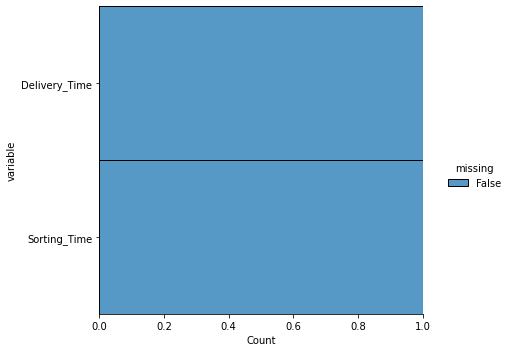

In [ ]:
# displot 
plt.figure(figsize=(10,6))
sns.displot(
    data = df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

## Fitting a model

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time ~ Sorting_Time",data = df).fit()

In [ ]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [ ]:
# r_squared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Predicting values

In [ ]:
# predictions
testdata = pd.Series([10,14,20,7])
pred = pd.DataFrame(testdata, columns = ['Sorting_Time'])
model.predict(pred)

0    23.072933
1    29.669013
2    39.563132
3    18.125873
dtype: float64

In [ ]:
df.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')